In [1]:
# Import libraries
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

In [2]:
# Load audio data files
pianoFile = "Datasets/Piano.wav"
#ipd.Audio(pianoFile)
piano, sr = librosa.load(pianoFile)  # load the file and set the sample rate

In [ ]:
# Change data into time-frequency domain format by extracting the short-time fourier transform
FRAME_SIZE = 2048 
HOP_SIZE = 512
stft_piano = librosa.stft(piano, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)  
#stft_piano.shape
# calculate squared magnitude of the stft result for spectrogram plotting
spec_piano = np.abs(stft_piano) ** 2

In [ ]:
# Function to plot a spectrogram given the spec data, sample rate, hop length and y-axis type
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(20,10))
    # specshow will display spectrogram type singals
    librosa.display.specshow(Y,
                            sr=sr,
                            hop_length=hop_length,
                            x_axis="time",
                            y_axis=y_axis)
    plt.colorbar(format="%+2.f dB")

In [ ]:
#plot_spectrogram(spec_piano, sr, HOP_SIZE)  # linear amplitude spectrogram

log_spec_piano = librosa.power_to_db(spec_piano)  # logarithmic amplitude spectrogram
plot_spectrogram(log_spec_piano, sr, HOP_SIZE, y_axis="log")  # scale the y-axis for log data

# Mel Spectrograms

In [9]:
# Extract filter banks data from audio file

filterBanks = librosa.filters.mel(n_fft=2048, sr= 22050, n_mels=20)
#filterBanks.shape

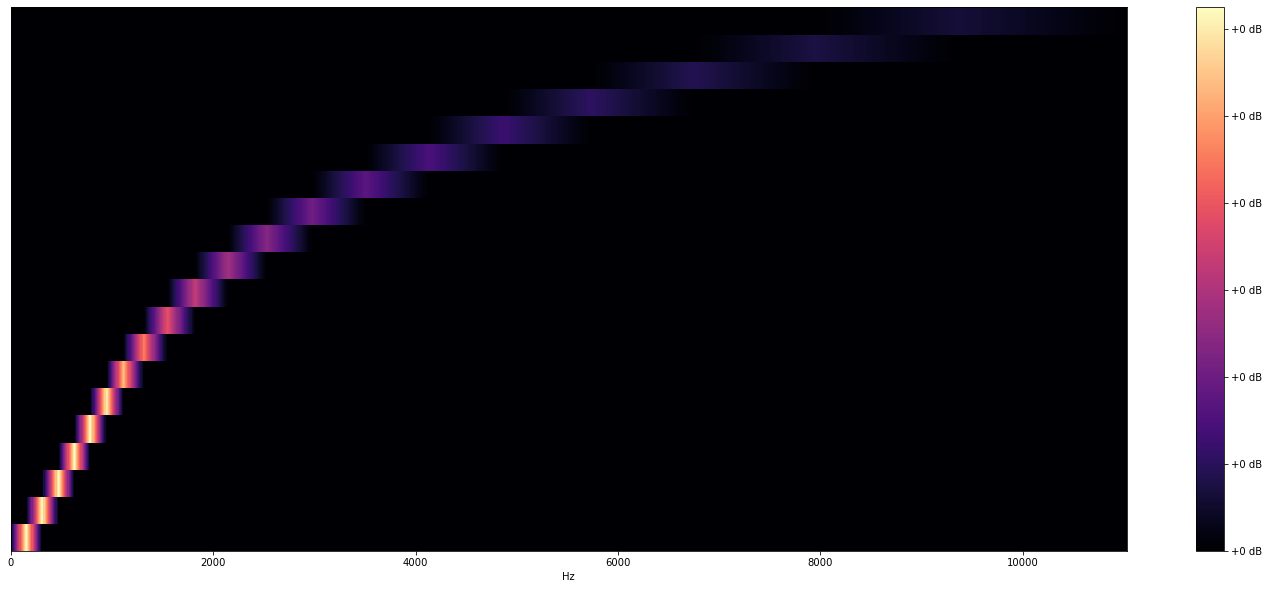

In [10]:
# Plot the filter bank data using librosa specshow

plt.figure(figsize=(25,10))
librosa.display.specshow(filterBanks,
                        sr=sr,
                        x_axis="linear")
plt.colorbar(format="%+2.f dB")
plt.show()

In [16]:
# Use the librosa function "melspectrogram" to create automatically create spectrogram data 
mel_spectrogram = librosa.feature.melspectrogram(piano, sr=sr, n_fft=2048, hop_length=512, n_mels=20)
#mel_spectrogram.shape

# Change the data to logarithmic amplitude
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
#log_mel_spectrogram.shape

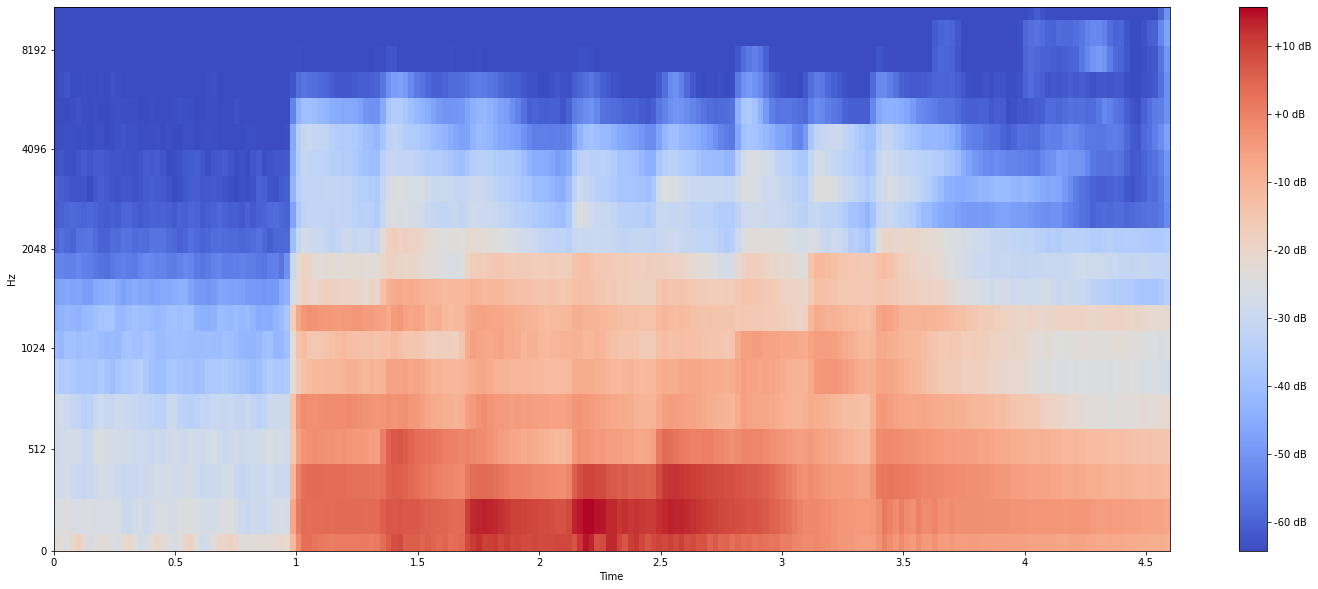

In [17]:
plt.figure(figsize=(25,10))
librosa.display.specshow(log_mel_spectrogram,
                         x_axis="time",
                         y_axis="mel",
                         sr=sr)
plt.colorbar(format="%+2.f dB")
plt.show()